<a href="https://colab.research.google.com/github/abj12798/Udacity_data_Analyst/blob/master/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install contextily
!pip install folium
!pip install kmodes


In [ ]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
import numpy as np

from tqdm import tqdm

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from kmodes.kmodes import KModes
from ipywidgets import interactive

from collections import defaultdict

#import hdbscan
import folium
import re


cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
        '#000075', '#808080']*10

In [ ]:
#Function to generate random points

import numpy as np
import random
import pandas as pd
import random as rd
from google.colab import files
from shapely.geometry import Polygon, Point
import geopandas as gpd


poly = Polygon([(28.881426, 77.075359), (28.856170, 77.211315), (28.417491, 77.166959),(28.582837, 76.848356),(28.822546, 76.952726)])
#######################function to generate random points##########################################################

def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds

    points = []

    while len(points) < num_points:       #O(n)
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append(random_point)

    return points


# **Data Wrangling**

In [ ]:
#loading Driver
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
d=gpd.read_file("/content/gdrive/My Drive/SIH20/Delhi/Districts.shp")
d.head()

OBJECTID  ...                                           geometry
0        99  ...  POLYGON ((77.26042 28.62286, 77.25705 28.62268...
1       167  ...  POLYGON ((77.30482 28.57678, 77.29593 28.58194...
2       417  ...  POLYGON ((77.25066 28.66244, 77.25021 28.66266...
3       413  ...  POLYGON ((77.21434 28.78352, 77.21329 28.78031...
4       420  ...  POLYGON ((77.17093 28.66833, 77.16689 28.67303...

[5 rows x 4 columns]

In [ ]:
Df= d['geometry']
Df


0    POLYGON ((77.26042 28.62286, 77.25705 28.62268...
1    POLYGON ((77.30482 28.57678, 77.29593 28.58194...
2    POLYGON ((77.25066 28.66244, 77.25021 28.66266...
3    POLYGON ((77.21434 28.78352, 77.21329 28.78031...
4    POLYGON ((77.17093 28.66833, 77.16689 28.67303...
5    POLYGON ((77.26042 28.62286, 77.26267 28.62114...
6    POLYGON ((77.26455 28.60747, 77.26558 28.60738...
7    POLYGON ((77.18253 28.64817, 77.18380 28.64638...
8    POLYGON ((77.17093 28.66833, 77.17072 28.66817...
Name: geometry, dtype: geometry

In [ ]:
def GenerateDataset(Df,crimeTypes,num_points):
  lx=[]
  ly=[]
  cr=[]
  i=0
  for poly in Df:
    ls=random_points_within(poly,num_points)
    for l in ls:
      
      lx.append(l.x)
      ly.append(l.y)
      cr.append(crimeTypes[i])
    i=(i+1)%4
  dictionarydb={'latitude':lx,'longitude':ly,'crimeActivity':cr}
  df = pd.DataFrame(dictionarydb)
  df.to_csv('dummy.csv') 
  files.download('dummy.csv')
  lx=[]
  ly=[]
  cr=[]
  return
  
  


In [ ]:
#Module to convert dataframe to geodataframe

def convertdftogdf(dummy_df):
  dummy_data=gpd.GeoDataFrame(dummy_df,geometry=gpd.points_from_xy(dummy_df['latitude'],dummy_df['longitude']))
  
  return dummy_data

# **Exploratory Data Analysis**

In [ ]:
df=pd.read_csv("/content/gdrive/My Drive/SIH20/Dataset/dummydataset.csv")
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [ ]:
#is duplicate
df.duplicated(subset=['latitude','longitude']).values.any()

False

In [ ]:
df.isna().values.any()

False

In [ ]:
import folium
m=folium.Map(location=[df.longitude.mean(),df.latitude.mean()],zoom_start=10,tiles='stamen toner')
for _,row in df.iterrows():
  folium.CircleMarker(location=[row.longitude,row.latitude],radius=0.5,popup=row.crimeActivity,color='#1787FE',fill=True,fill_color='#1787FE').add_to(m)
m

# **Analytics **

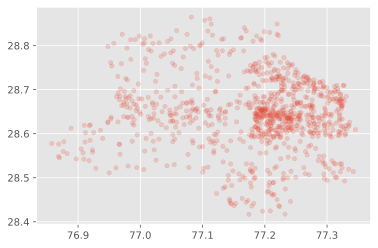

In [ ]:
#Taking idea of Distribution of crime density
import numpy as np

X=np.array(df[['latitude','longitude']],dtype='float64')
plt.scatter(X[:,0],X[:,1],alpha=0.2,s=20)

In [ ]:
#making clusters
from sklearn.datasets import make_blobs
X_blobs,_ = make_blobs(n_samples=1000,centers=10,n_features=3,cluster_std=0.5,random_state=4)

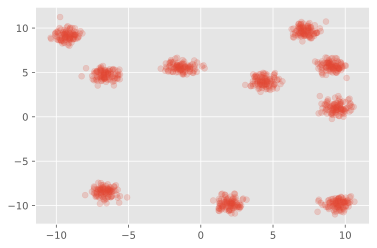

In [ ]:
#clusters groups
import matplotlib as plt
plt.pyplot.scatter(X_blobs[:,0],X_blobs[:,1],alpha=0.2)

In [ ]:
#clutering via a Kmeans Algorithm
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4,random_state=17).fit(X_blobs)
class_predictions=model.predict(X_blobs)

In [ ]:
class_predictions

array([1, 2, 0, 2, 0, 2, 2, 3, 2, 0, 0, 2, 1, 1, 3, 2, 0, 2, 3, 1, 2, 1,
       2, 0, 2, 1, 0, 1, 0, 2, 3, 1, 0, 0, 0, 1, 1, 3, 1, 3, 3, 2, 2, 1,
       1, 2, 2, 2, 0, 3, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 3, 1, 2, 2,
       3, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 0, 3, 0, 1, 0, 0, 1,
       0, 1, 2, 1, 3, 1, 0, 3, 1, 2, 0, 1, 0, 1, 3, 0, 2, 3, 3, 0, 0, 3,
       1, 2, 1, 0, 1, 1, 1, 0, 2, 3, 0, 0, 1, 0, 1, 3, 0, 2, 1, 1, 2, 1,
       3, 1, 1, 3, 1, 1, 2, 3, 3, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 0,
       2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 0, 1, 2, 1, 2, 1, 2,
       0, 2, 2, 1, 3, 3, 3, 2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 2,
       1, 1, 3, 0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 2, 3, 0, 0, 0, 1, 3, 1, 3,
       1, 2, 2, 3, 0, 2, 2, 2, 1, 0, 1, 3, 2, 1, 2, 2, 1, 1, 2, 3, 0, 0,
       2, 1, 3, 3, 1, 2, 2, 2, 2, 2, 3, 1, 2, 1, 3, 0, 1, 0, 0, 0, 3, 1,
       0, 3, 0, 0, 3, 3, 3, 3, 1, 3, 1, 3, 2, 0, 0, 3, 2, 0, 2, 2, 3, 3,
       1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 2, 2, 1, 3, 1,

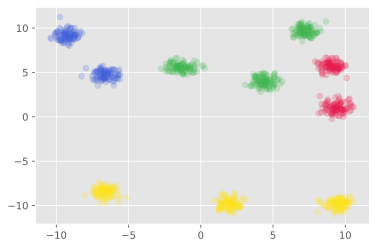

In [ ]:
unique_clusters=np.unique(class_predictions)
cols=['#e6194b','#3cb44b','#ffe119','#4363d8']
for unique_cluster in unique_clusters:
  X=X_blobs[class_predictions==unique_cluster]
  plt.pyplot.scatter(X[:,0],X[:,1],alpha=0.2,c=cols[unique_cluster])

There are four unique clusters formed when kmeans clustering alogorithm is applied it can be clustered as the crime activity in the location. 

In [ ]:
data = defaultdict(dict)
for x in range(1,21):
    model = KMeans(n_clusters=4, random_state=17, 
                   max_iter=x, n_init=1).fit(X_blobs)
    
    data[x]['class_predictions'] = model.predict(X_blobs)
    data[x]['centroids'] = model.cluster_centers_
    data[x]['unique_classes'] = np.unique(class_predictions)

In [ ]:
import matplotlib.pyplot as plt
#function to compute the centroid,clusters at a particular instance of iteration.
def f(x):
    class_predictions = data[x]['class_predictions']
    centroids = data[x]['centroids']
    unique_classes = data[x]['unique_classes']

    for unique_class in unique_classes:
            plt.scatter(X_blobs[class_predictions==unique_class][:,0], 
                        X_blobs[class_predictions==unique_class][:,1], 
                        alpha=0.3, c=cols[unique_class])
    plt.scatter(centroids[:,0], centroids[:,1], s=200, c='#000000', marker='v')
    plt.ylim([-15,15]); plt.xlim([-15,15])
    plt.title('How K-Means Clusters')

interactive_plot = interactive(f, x=(1, 21))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=11, description='x', max=21, min=1), Output(layout=Layout(height='350px'…

In [ ]:

v_kmeans=silhouette_score(X_blobs,class_predictions)

**KModes**


In [ ]:
X_blobs, _ = make_blobs(n_samples=1000, centers=50, 
                        n_features=3, cluster_std=1, random_state=4)

In [ ]:

df['category_crime']=pd.factorize(df.crimeActivity)[0]
df
X=np.array(df[['longitude','latitude','category_crime']])
X
km = KModes(n_clusters=4, init='Huang', n_init=100, verbose=1)  #clustrinf taking cataegorical data as feature
class_predictions=km.fit_predict(X,categorical=[2])
df['cluster_kmodes']=class_predictions #Adding Results of clusters in data


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2192.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 198, cost: 1993.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 197, cost: 1794.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1792.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1992.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 1992.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 1792.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/

In [ ]:
def makemap(df,cluster_column):
  m=folium.Map(location=[df.longitude.mean(),df.latitude.mean()],zoom_start=10,tiles='stamen toner')
  for _, row in df.iterrows():

      
      cluster_colour = cols[row[cluster_column]]

      folium.CircleMarker(
          location= [row.longitude,row.latitude],
          radius=0.5,
          popup= row.crimeActivity,
          color=cluster_colour,
          fill=True,
          fill_color=cluster_colour
      ).add_to(m)
  return m
m=makemap(df,'cluster_kmodes')
v_k_modes=silhouette_score(X, class_predictions)
m.save('kmeans_70.html')

In [ ]:
m

# **DBSCAN**

In [ ]:
model=DBSCAN(eps=0.1,min_samples=4).fit(X)
class_predictions=model.labels_
df['cluster_DBSCAN']=class_predictions

In [ ]:
m=makemap(df,'cluster_DBSCAN')
m

In [ ]:

print(f'Number of clusters found: {len(np.unique(class_predictions))}')
print(f'Number of outliers found: {len(class_predictions[class_predictions==-1])}')

vDBSCAN=silhouette_score(X[class_predictions!=-1], class_predictions[class_predictions!=-1])

no_outliers = 0
no_outliers = np.array([(counter+2)*x if x==-1 else x for counter, x in enumerate(class_predictions)])
print(vDBSCAN)



Number of clusters found: 4
Number of outliers found: 0
0.8743454519212445


In [ ]:
plotbar=[]
plotbar.append(v_kmeans)
plotbar.append(v_k_modes)
plotbar.append(vDBSCAN)


In [ ]:
plotbar

[0.6269551563953502, 0.8743454519212445, 0.8743454519212445]

In [ ]:
plotnames=['kmeans','DBSCAN','kmodes']

#  **Clustering Report**

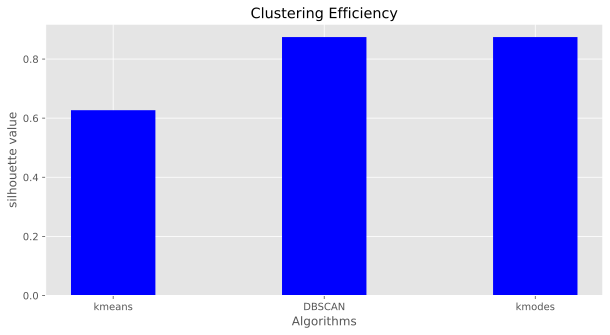

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt   
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(plotnames, plotbar, color ='Blue',  
        width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("silhouette value") 
plt.title("Clustering Efficiency") 
plt.show() 

**silhouette value** can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.
So, here ranking as per **silhouette value**.

                                            DBSCAN>Kmeans>Kmodes

**Outlier Detection**


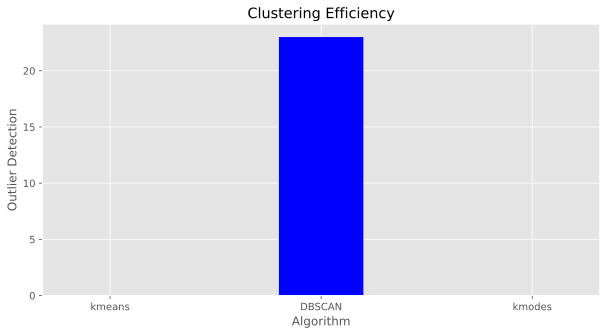

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt   
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(plotnames, [0,23,0], color ='Blue',  
        width = 0.4) 
  
plt.xlabel("Algorithm") 
plt.ylabel("Outlier Detection") 
plt.title("Clustering Efficiency") 
plt.show() 

# **SVM**

In [ ]:
#Accuracy
testpath="/content/gdrive/My Drive/SIH20/Dataset/testingdata.csv"
test_df=pd.read_csv(testpath)
test_df.drop(test_df.columns[test_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test_df['category_crime']=pd.factorize(test_df.crimeActivity)[0]
test_df



latitude  longitude   crimeActivity  category_crime
0   77.238341  28.643261  Pick Pocketing               0
1   77.240632  28.636083       Vandalism               1
2   77.256641  28.637485  Chain Snaching               2
3   77.248967  28.648466  Chain Snaching               2
4   77.231652  28.640252  Chain Snaching               2
..        ...        ...             ...             ...
85  77.082188  28.653891       Vandalism               1
86  76.976599  28.690419  Pick Pocketing               0
87  77.028264  28.627934       Vandalism               1
88  77.036278  28.670481       Vandalism               1
89  77.129268  28.649033  Pick Pocketing               0

[90 rows x 4 columns]

In [ ]:
testX=np.array(test_df[['longitude','latitude']],dtype='float64')
testY=np.array(test_df[['category_crime']],dtype='int')

In [ ]:
#Traning Dataset
x=np.array(train[['longitude','latitude']],dtype='float64')
y=np.array(train[['category_crime']],dtype='int')

SVM_Kernel=[]
Accuracy=[]


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel="linear")
clf.fit(x,y)
SVM_Kernel.append('linear')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pred=clf.predict(testX)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,testY)
Accuracy.append(acc)

In [ ]:
rbf_svc = svm.SVC(kernel='rbf',C=1000,gamma=1000)
rbf_svc.fit(x,y)
SVM_Kernel.append('rbf')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pred=rbf_svc.predict(testX)
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,testY)
Accuracy.append(acc)


In [ ]:
sig_svc = svm.SVC(kernel='sigmoid',C=1,gamma=1)
sig_svc.fit(x,y)
SVM_Kernel.append('sigmoid')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pred=sig_svc.predict(testX)
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,testY)
Accuracy.append(acc)

In [ ]:
SVM_Kernel
Accuracy

[0.23333333333333334, 0.28888888888888886, 0.23333333333333334]

# **Classification Report**

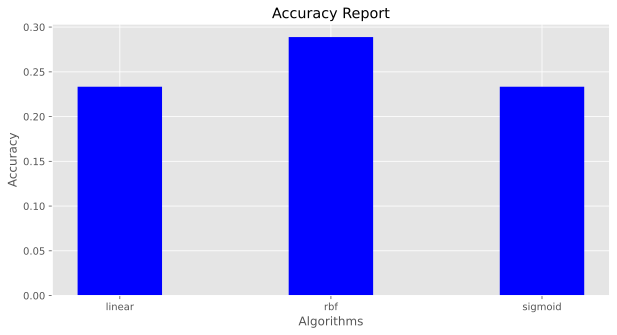

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt   
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(SVM_Kernel, Accuracy, color ='Blue',  
        width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("Accuracy") 
plt.title("Accuracy Report") 
plt.show() 

# **Conclusion**